# MTH9875 Homework 5

Assigned: September 22, 2016.
Due: October 6, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

<font color = "purple">
###Solution:
We start by constructing a portfolio,with long a call and short a put with the same $T$ and $K$, then we have the payoff($P$) of the portfolio:

$$
P = max(S_T - K, 0) - max(K - S_T, 0) = S_T - K
$$

which is a straight line, the exact payoff of a Forward contract with expiration $T$ and strike $K$.

Under no arbitrage condition, the cost of the portfolio must be equal to the cost of the Forward contract.

The payoff of the forward contract is $F_T - K$. The cost equals to the payoff times a discount factor. 

Therefore,
$$
C - P = PV(F - K)
$$

### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
source("Heston.R")

Warning message in file(filename, "r", encoding = encoding):
“无法打开文件'Heston.R': No such file or directory”

ERROR: Error in file(filename, "r", encoding = encoding): 无法打开链结


### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

In [3]:
#original data from the table
K <- c(1190, 1195, 1200, 1205, 1210, 1215)
C <- c(52.33, 49.11, 46.59, 43.13, 40.21, 37.45)
P <- c(37.51, 39.34, 41.52, 42.55, 45.40, 47.57)

Put_Call_Parity <- function(C, P, K)
{# Linear regression for forward and discount factor
    x <- C - P        
    output <- lm(x ~ K)
    PV <- -output$coeff[2]      #discount factor
    F <- output$coeff[1] / PV   #forward
    return (c(PV, F))
}

#store the forward and discount factor into "res"
res <- Put_Call_Parity(C, P, K)  
PV <- res[1]
F <- res[2]
cat("PV =", PV, "F=", F)

BS_backout <- function(PV, F, T)
{    
    return (c(PV * F, T, log(PV) / (-T)))
}

res <- BS_backout(PV, F, 36 / 365.25)
S0 <- res[1]
T <- res[2]
r <- res[3]
vols <- BSImpliedVolCall(S0, K, T, r, C)
data.frame(cbind(K, C, P, vols))

PV = 0.9946857 F= 1205.002

K,C,P,vols
1190,52.33,37.51,0.2982052
1195,49.11,39.34,0.2941361
1200,46.59,41.52,0.2941983
1205,43.13,42.55,0.2873950
1210,40.21,45.40,0.2836099
1215,37.45,47.57,0.2802798


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [6]:
install.packages("stinepack")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")


The downloaded binary packages are in
	/var/folders/jj/8s5vmnjd1rb8wlzzs915f6nm0000gn/T//RtmpLdfEGa/downloaded_packages


*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [7]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110.0
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210.0
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


### 3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


In [43]:
#(a)
storedata <- function(spxData)
{
    #Store put and call
    spxC <- subset(spxData[,c("exdate", "strike_price", "cp_flag", "best_bid", "best_offer", "open_interest")], cp_flag == "C")
    spxP <- subset(spxData[,c("exdate", "strike_price", "cp_flag", "best_bid", "best_offer", "open_interest")], cp_flag == "P")
    #Combine the data into one frame
    spx_combined <- merge(spxC, spxP, by=c("exdate","strike_price"))
    optionByExDates <- split(spx_combined , f = spx_combined$exdate) 
    return (optionByExDates)
}

BSArg_backout <- function(data, T)
{
    filter_data <- subset(data, best_bid.x > 0 &  best_bid.y > 0)
    call_mid <- (filter_data['best_bid.x'] + filter_data['best_offer.x']) / 2
    put_mid <- (filter_data['best_bid.y'] + filter_data['best_offer.y']) / 2        
    reg_Res <- Put_Call_Parity(as.vector(call_mid)[[1]], as.vector(put_mid)[[1]], as.vector(filter_data['strike_price'])[[1]])
    arg_Res <- BS_backout(reg_Res[1],reg_Res[2], T)
    return(arg_Res)
}

In [44]:
tmp <- storedata(spxData110915)
head(tmp[[1]])

exdate,strike_price,cp_flag.x,best_bid.x,best_offer.x,open_interest.x,cp_flag.y,best_bid.y,best_offer.y,open_interest.y
20110917,100000,C,1106.4,1110.0,0,P,0,0.05,0
20110917,1000000,C,206.4,210.0,4213,P,0,0.05,121754
20110917,1005000,C,200.2,204.1,11,P,0,0.05,2298
20110917,1010000,C,195.2,199.1,5,P,0,0.05,5810
20110917,1015000,C,190.2,194.1,5,P,0,0.05,4321
20110917,1020000,C,186.5,190.1,10,P,0,0.05,9221


In [51]:
calImpVol <- function(subdata, S0, r)
{ 
    #store data
    T <- subdata['Texp'][[1]]
    #res['Expiry'] <- subdata[, 'exdate']
    #res['Texp'] <- subdata[, 'Texp']
    #res['Strike'] <- subdata[, 'strike_price']
    out <- subdata[, c('exdate', 'Texp', 'strike_price')] 
    #imp vol of the call
    out['Bid'] <- BSImpliedVolCall(S0, as.vector(subdata['strike_price'])[[1]], T, r, as.vector(subdata['best_bid.x'])[[1]])
    out['Ask'] <- BSImpliedVolCall(S0, as.vector(subdata['strike_price'])[[1]], T, r, as.vector(subdata['best_offer.x'])[[1]])
    
    Fwd <- S0 * exp(r * T)
    out['Fwd'] <- Fwd
    colnames(res) <- c("Expiry", "Texp", "Strike", "Bid", "Ask", "Fwd")
    tol <- 2e-10
    min_Bid <- min(out$Bid) 
    min_Ask <- min(out$Ask) 
    out$Bid[out$Bid == min_Bid] <- NaN
    out$Ask[out$Ask == min_Ask] <- NaN
    return(out)
}
generateIvols <- function(spxData)
{
    # The evaluation date
    valDate <- as.Date(toString(unique(spxData110915[,"date"])[1]), '%Y%m%d')
    optionByExDates <- storedata(spxData)
    exDateCnt <- length(optionByExDates)
    # Store the final result
    df <- data.frame(Expirys=character(),
                     Texp=double(),
                     Strike=integer(),
                     Bid=double(),
                     Ask=double(),
                     Fwd=double())   
    # Loop through each ex dates
    for (i in  1:exDateCnt)
    {
        subdata <- optionByExDates[[i]]
        subdata['Texp'] <- (as.Date(toString(unique(subdata[,'exdate'])[1]), '%Y%m%d') - valDate) / 365.25
        arg_Res <- BSArg_backout(subdata, subdata['Texp'][[1]])
        S0 <- arg_Res[1]
        T <- arg_Res[2]
        r <- arg_Res[3]           
        res <- calImpVol(subdata, S0, r)
        df <- rbind(df, res)
        #print(head(res))
        #cat("\nS0=",S0, "T=",T,"r=",r, "\n")
    }
    #return(optionByExDates)
    return(df)
}

In [56]:
res <- generateIvols(spxData110915)
head(res)

exdate,Texp,strike_price,Bid,Ask,Fwd
20110917,0.005475702,100000,10,NaN,1207.987
20110917,0.005475702,1000000,10,NaN,1207.987
20110917,0.005475702,1005000,10,NaN,1207.987
20110917,0.005475702,1010000,10,NaN,1207.987
20110917,0.005475702,1015000,10,NaN,1207.987
20110917,0.005475702,1020000,10,NaN,1207.987


In [57]:
#(b)
volData <- res[with(res, order(Expiry, Strike)), ]
plotIvols(volData)

ERROR: Error in order(Expiry, Strike): 找不到对象'Expiry'


## Approximate calibration of the Heston parameters

### 4.  (26 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2 of Lecture 5. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first expiries, as in Lecture 5.


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.

(f)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (20) 

$$
\left.{\sigma_{BS}(K,T)^2}\right|_{K=F_T} \approx \left( {{ v - \bar v'}}\right)\frac{1- e^{ -
\lambda' \,T}}{\lambda' \,T} + \bar v'.
$$

for ATM variance to the empirical ATM variance estimates in Table 2 of Lecture 5.

(g) Graph the empirical ATM variance vs time to expiration and your fit from (f) to generate a plot like Figure 9 of Lecture 5.

(h)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (c) and (f) to get a picture like Figure 4 or Figure 7 of Lecture 5 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)

(i) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

In [66]:
#(a)
skewHeston <- function(skew_Params,texp)
{#skew of heston
    rhoeta <- skew_Params[1]
    lam <- skew_Params[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)
    return(skew)    
}

skewObj <- function(skew_Params)
{
    skew_Model <- skewHeston(skew_Params,texp[-1])
    skew_Emp <- atm_Skews[-1]
    objective <-sum((skew_Model-skew_Emp)^2)
    return(objective*1000000)
}

In [67]:
#data input
atm_Skews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.0054757015742642, 0.101300479123888, 0.177960301163587,0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)

In [70]:
#(b)
res1 <- optim(c(-0.7*.39,1.15),skewObj)
fit1 <- res1$par 
eta <- fit1[1] / (-0.7)
lambda <- fit1[2]
eta
lambda

[1] 1.706774

[1] 5.54054

In [82]:
#(c)
atm_Skews <- c(-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)
res2 <- optim(c(-0.7*.39,1.15),skewObj)
fit2 <- res1$par 
eta <- fit2[1] / (-0.7)
lambda <- fit2[2]
eta
lambda

[1] 1.706774

[1] 5.54054

In [83]:
#(d)
skewPowerLaw <- function(alpha,t)
{
    return(atmSkews[5]*(t/texp[5])^alpha)   
}

skewObj2 <- function(alpha)
{    
    skew_Model <- skewPowerLaw(alpha,texp[-1])
    skew_Emp <- atm_Skews[-1]
    obj <-sum((skew_Model-skew_Emp)^2)
    return(obj*1000000)
}

atm_Skews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.0054757015742642, 0.101300479123888, 0.177960301163587,0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)
res3 <- optim(c(-0.7*.39,1.15),skewObj2)
fit3 <- res3$par 
alpha <-fit3[1]
alpha

[1] -0.8588859

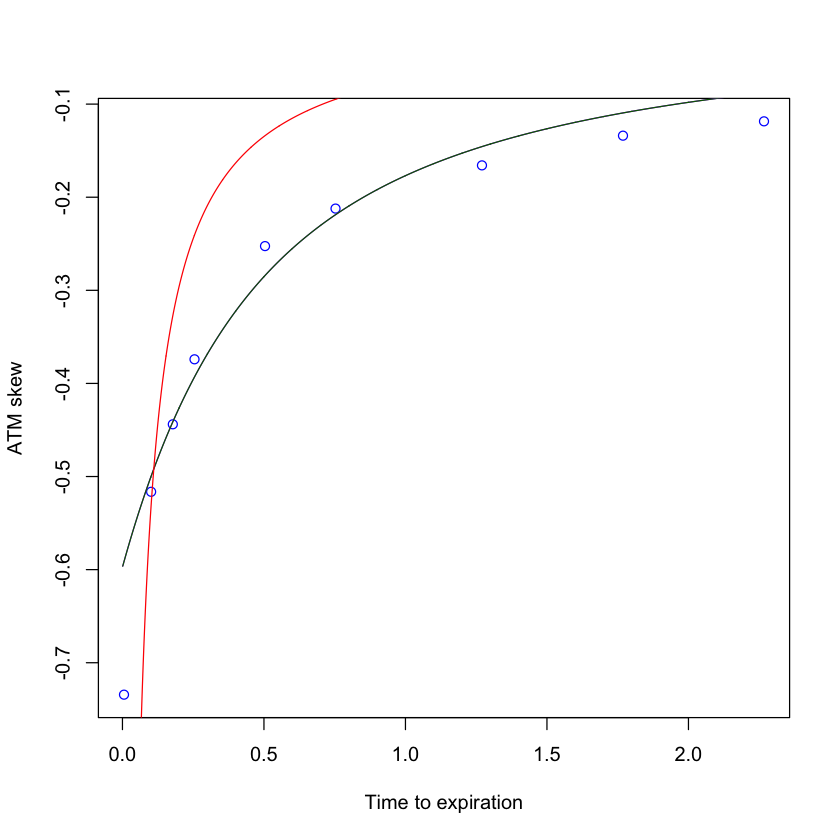

In [94]:
#(e)
x = seq(0,2.4,by=0.001)
plot(texp,atm_Skews,col="blue",xlab="Time to expiration",ylab="ATM skew")
lines(x,skewHeston(fit1,x),col="purple")
lines(x,skewHeston(fit2,x),col="dark green")
lines(x,skewPowerLaw(fit3[1],x),col="red")

In [92]:
#(f)
plotIvolsHeston <- function (ivolData, sviMatrix = NULL, slices = NULL) 
{
    bidVols <- as.numeric(ivolData$Bid)
    askVols <- as.numeric(ivolData$Ask)
    expDates <- unique(ivolData$Texp)
    nSlices <- length(expDates)
    if (!is.null(slices)) {
        nSlices <- length(slices)
    }
    else {
        slices <- 1:nSlices
    }
    colnum <- sqrt(nSlices * 2)
    rows <- round(colnum/2, 0)
    columns <- round(colnum, 0)
    while (rows * columns < nSlices) {
        rows <- rows + 1
    }
    atmVol <- numeric(nSlices)
    atm_Skew <- numeric(nSlices)
    #par(mfrow = c(rows, columns), mex = 0.5)
    for (slice in slices) {
        t <- expDates[slice]
        texp <- ivolData$Texp
        bidVol <- bidVols[texp == t]
        askVol <- askVols[texp == t]
        midVol <- (bidVol + askVol)/2
        f <- (ivolData$Fwd[texp == t])[1]
        k <- log(ivolData$Strike[texp == t]/f)
        include <- !is.na(bidVol)
        kmin <- min(k[include])
        kmax <- max(k[include])
        ybottom <- 0.8 * min(bidVol[include])
        ytop <- 1.2 * max(askVol[include], na.rm = T)
        xrange <- c(kmin, kmax)
        yrange <- c(ybottom, ytop)
        plot(k, bidVol, col = "red", pch = 18, cex = 0.5, xlim = xrange, 
            ylim = yrange, main = paste("T =", format(t, digits = 2, 
                nsmall = 2)), xlab = "Log-Strike", ylab = "Implied Vol.")
        par(new = T)
        plot(k, askVol, col = "blue", pch = 18, cex = 0.5, xlim = xrange, 
            ylim = yrange, main = NA, xlab = NA, ylab = NA)
        paramsFit1 <- list(lambda = fit1[2],rho = -0.7,eta = fit2[1] / (-0.7),vbar = 0.04,v = 0.04) 
        ImpliedVols <- sapply(k,function(x){impvolHeston(paramsFit1)(x,t)}) 
        lines(k,ImpliedVols)
        if ((!is.null(sviMatrix))) {
            vol <- function(k) {
                sqrt(svi(sviMatrix[slice, ], k)/t)
            }
            par(new = T)
            curve(vol(x), from = kmin, to = kmax, col = "orange", 
                lwd = 2, add = T)
        }
        kIn <- k[!is.na(midVol)]
        volIn <- midVol[!is.na(midVol)]
        volInterp <- function(xout) {
            stinterp(x = kIn, y = volIn, xout)$y
        }
        atmVol[slice] <- volInterp(0)
        atm_Skew[slice] <- (volInterp(0.01) - volInterp(-0.01))/0.02
    }
    par(mfrow = c(1, 1), mex = 1)
    par(new = F)
    return(list(expiries = expDates, atmVol = atmVol, atm_Skew = atm_Skew))
}

Warning message in min(k[include]):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(k[include]):
“max里所有的参数都不存在；回覆-Inf”Warning message in min(bidVol[include]):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(askVol[include], na.rm = T):
“max里所有的参数都不存在；回覆-Inf”Warning message in min(x):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(x):
“max里所有的参数都不存在；回覆-Inf”Warning message in min(x):
“min里所有的参数都不存在; 回覆Inf”Warning message in max(x):
“max里所有的参数都不存在；回覆-Inf”

ERROR: Error in plot.window(...): 'xlim'值不能是无限的


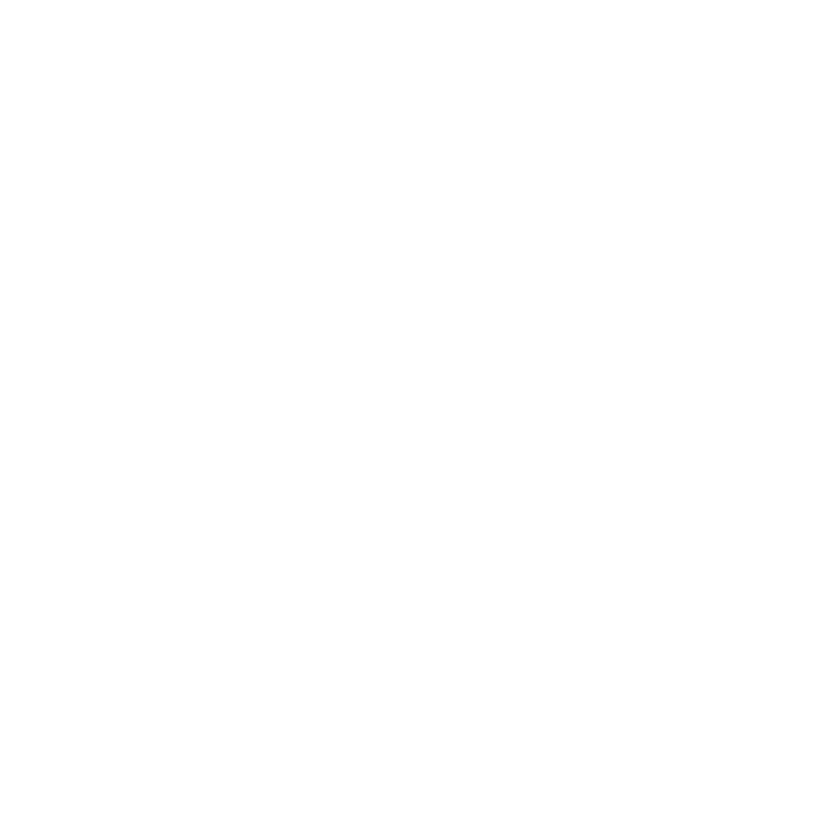

In [93]:
volSelect <- generateIvols(spxData110915)
volSelect <- volSelect[volSelect$cp_flag=="C",]
volSelect <- volSelect[with(volSelect, order(Texp, strike_price)), ]
plotIvolsHeston(volSelect)

(g)

Heston smiles are consistently below the empirical smiles, because heston model cannot have that much kink due to the fixed shape(fixed formulas), therefore lack of freedom.

Heston skews comparing with empirical skews may not match all the points very well, which is also due to the fixed shape (fixed formulas) , therefore lack of freedom.